In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Data_f = pd.read_csv(r'Diwali_Sales_Data.csv', encoding = 'unicode_escape')

In [3]:
Data_f.shape

(11251, 15)

In [4]:
Data_f.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
Data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
Data_f.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
Data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
pd.isnull(Data_f).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
Data_f.dropna(inplace=True)

In [10]:
pd.isnull(Data_f).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
Data_f['Amount'] = Data_f['Amount'].astype('int')

In [12]:
Data_f['Amount'].dtype

dtype('int64')

In [13]:
Data_f.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
Data_f[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [15]:
Data_f.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Analysis based on Gender 

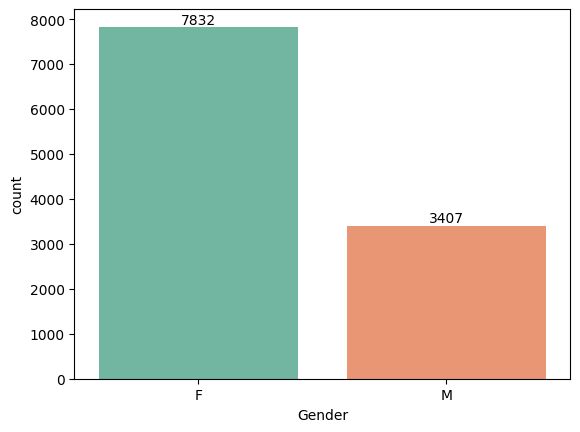

In [44]:
gr = sns.countplot(x='Gender', hue='Gender', data=Data_f, palette='Set2', legend=False)

for bars in gr.containers:
    gr.bar_label(bars)


<Axes: xlabel='Gender', ylabel='Amount'>

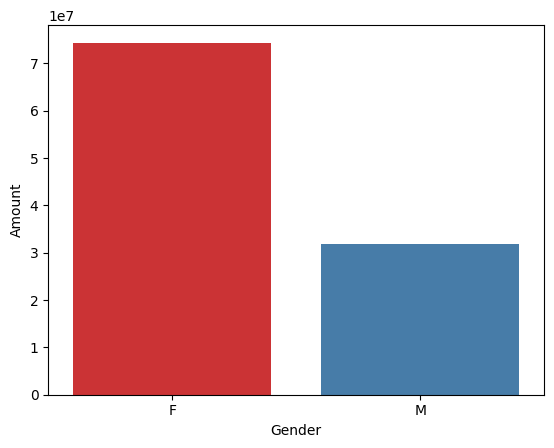

In [53]:
sales_by_gender = Data_f.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Gender', y='Amount', hue='Gender', data=sales_by_gender, palette='Set1')

#### The above two plots conclude that most of the buyers are women and their purchasing power is also greater than men

## Analysis based on Age

In [40]:
Data_f.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

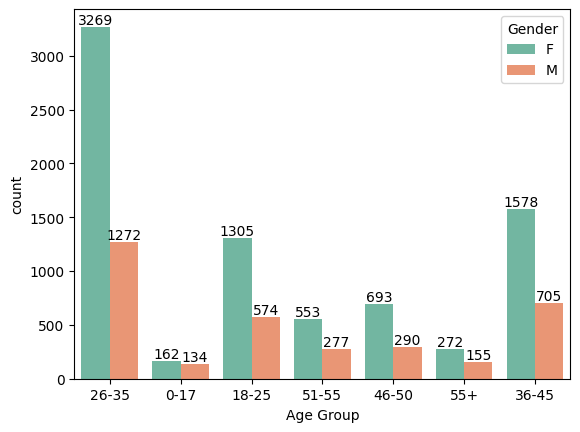

In [54]:
age_x = sns.countplot(x='Age Group', hue='Gender', data=Data_f, palette='Set2', legend=True)

for bars in age_x.containers:
    age_x.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

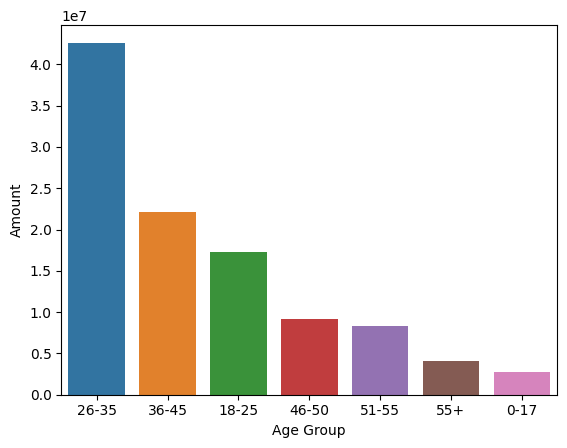

In [61]:
sales_by_age = Data_f.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', hue='Age Group', data=sales_by_age)

#### The above two plots conclude that women of the age group of 26-35 spent the largest amount and are most in number

## Analysis based on State

In [62]:
Data_f.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

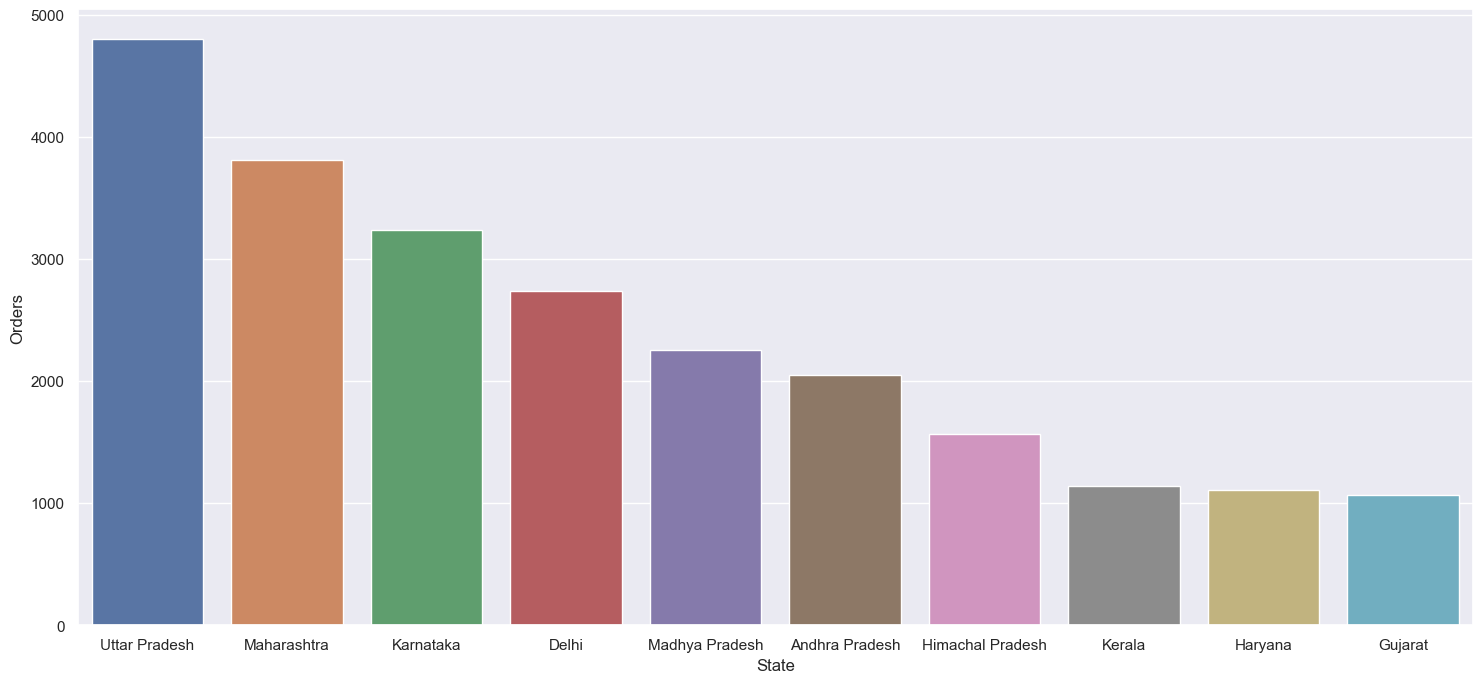

In [72]:
sales_by_state = Data_f.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc= {'figure.figsize' : (18,8)})
sns.barplot(x='State', y='Orders', hue='State', data=sales_by_state)

<Axes: xlabel='State', ylabel='Amount'>

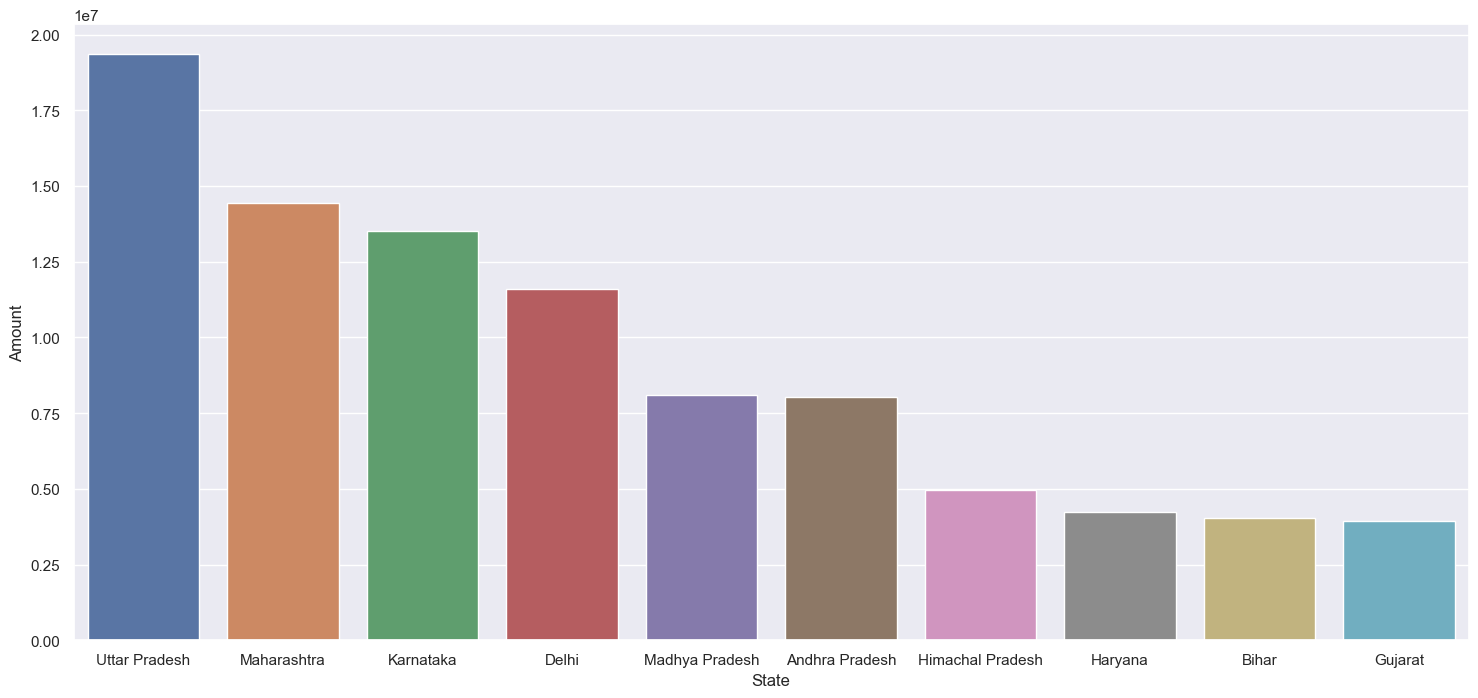

In [73]:
sales_by_state_amt = Data_f.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc= {'figure.figsize' : (18,8)})
sns.barplot(x='State', y='Amount', hue='State', data=sales_by_state_amt)

#### The above two plots conclude that the most of the orders and total sales are from the states of Uttar Pradesh, Maharashtra and Karnataka 

## Analysis by Marital Status

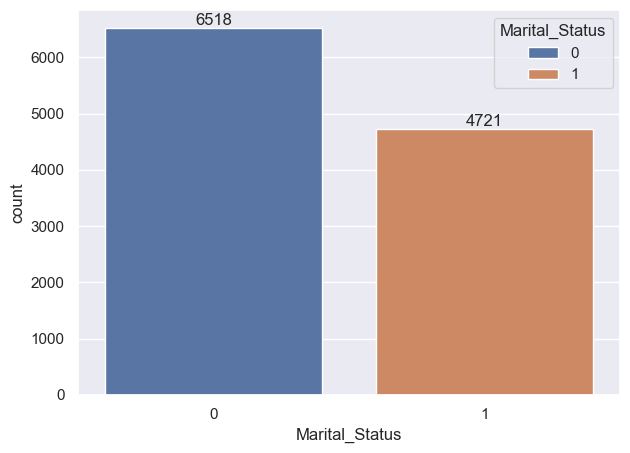

In [77]:
mr = sns.countplot(x='Marital_Status', data=Data_f, hue='Marital_Status')

sns.set(rc= {'figure.figsize': (7,7)})
for bars in mr.containers:
    mr.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

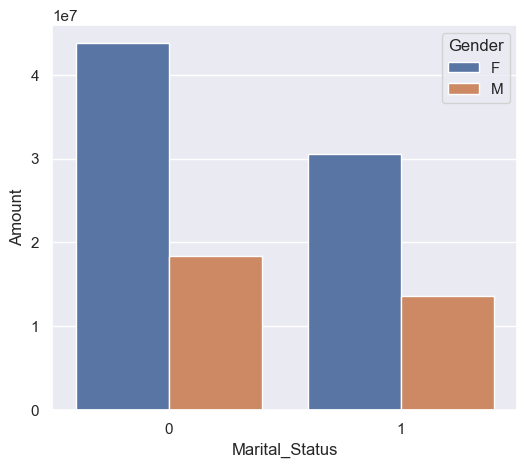

In [87]:
sales_by_mar_status = Data_f.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc= {'figure.figsize': (6,5)})
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=sales_by_mar_status)

#### The above two plots conclude that most of the buyers are married and women among them have higher purchasing power

## Analysis based on Occupation

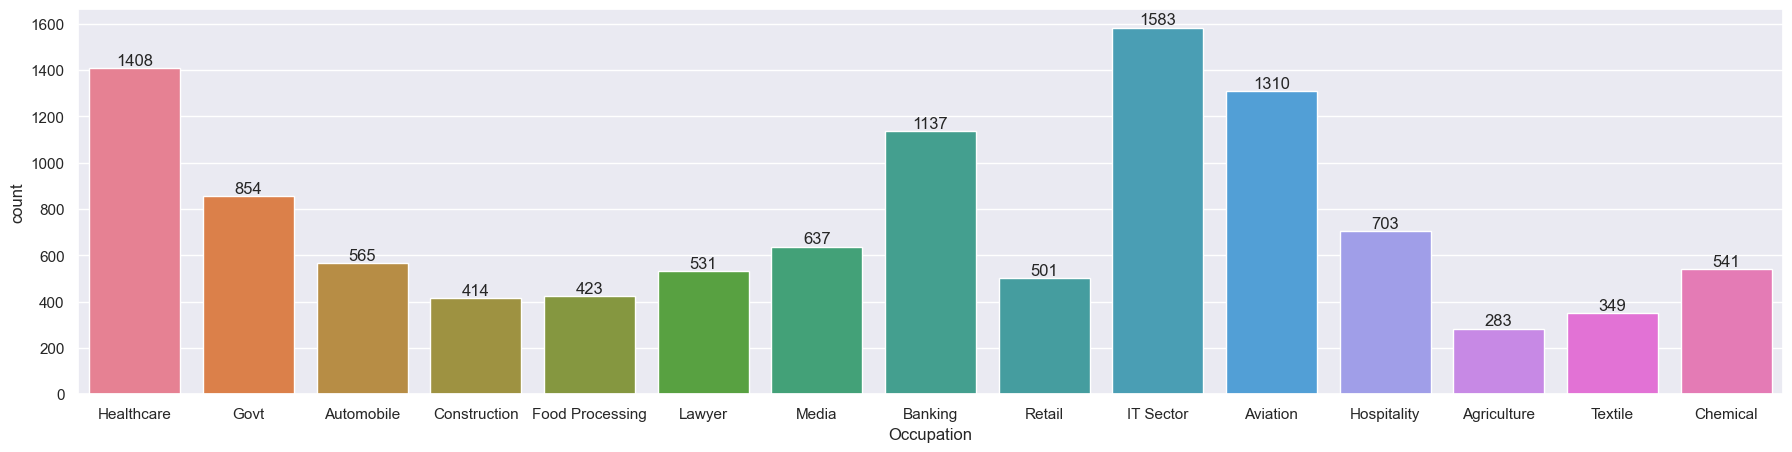

In [90]:
sns.set(rc= {'figure.figsize': (22,5)})

oc = sns.countplot(x='Occupation', data=Data_f, hue='Occupation')

for bars in oc.containers:
    oc.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

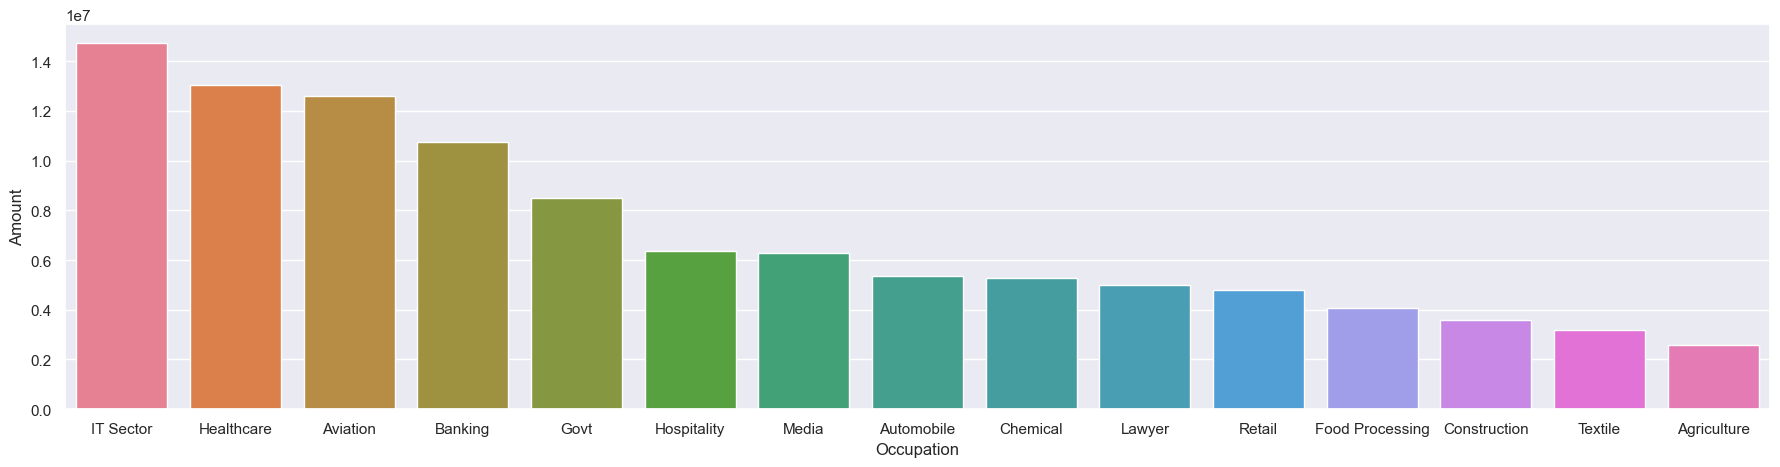

In [92]:
sales_by_occupation = Data_f.groupby('Occupation', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Occupation', y='Amount', hue='Occupation', data=sales_by_occupation)

#### From the above two plots we can conclude that most of the buyers are from IT, Healthcare and Aviation sector

## Analysis based on Product

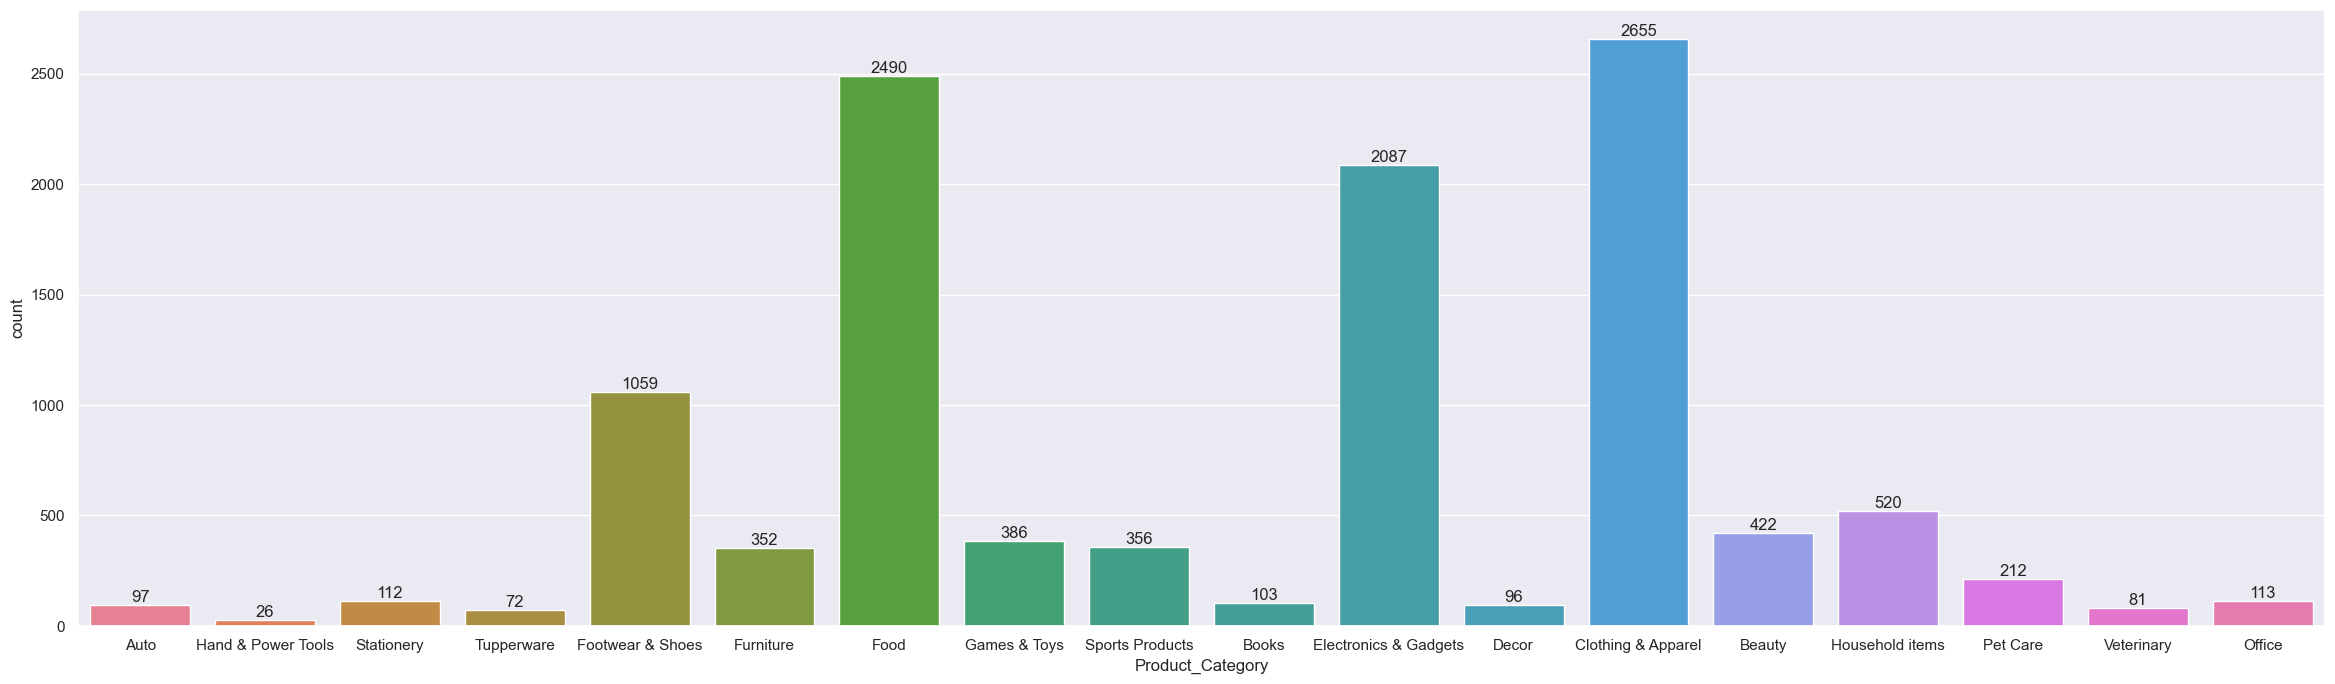

In [98]:
sns.set(rc= {'figure.figsize': (29,8)})

pc = sns.countplot(x='Product_Category', data=Data_f, hue='Product_Category')

for bars in pc.containers:
    pc.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

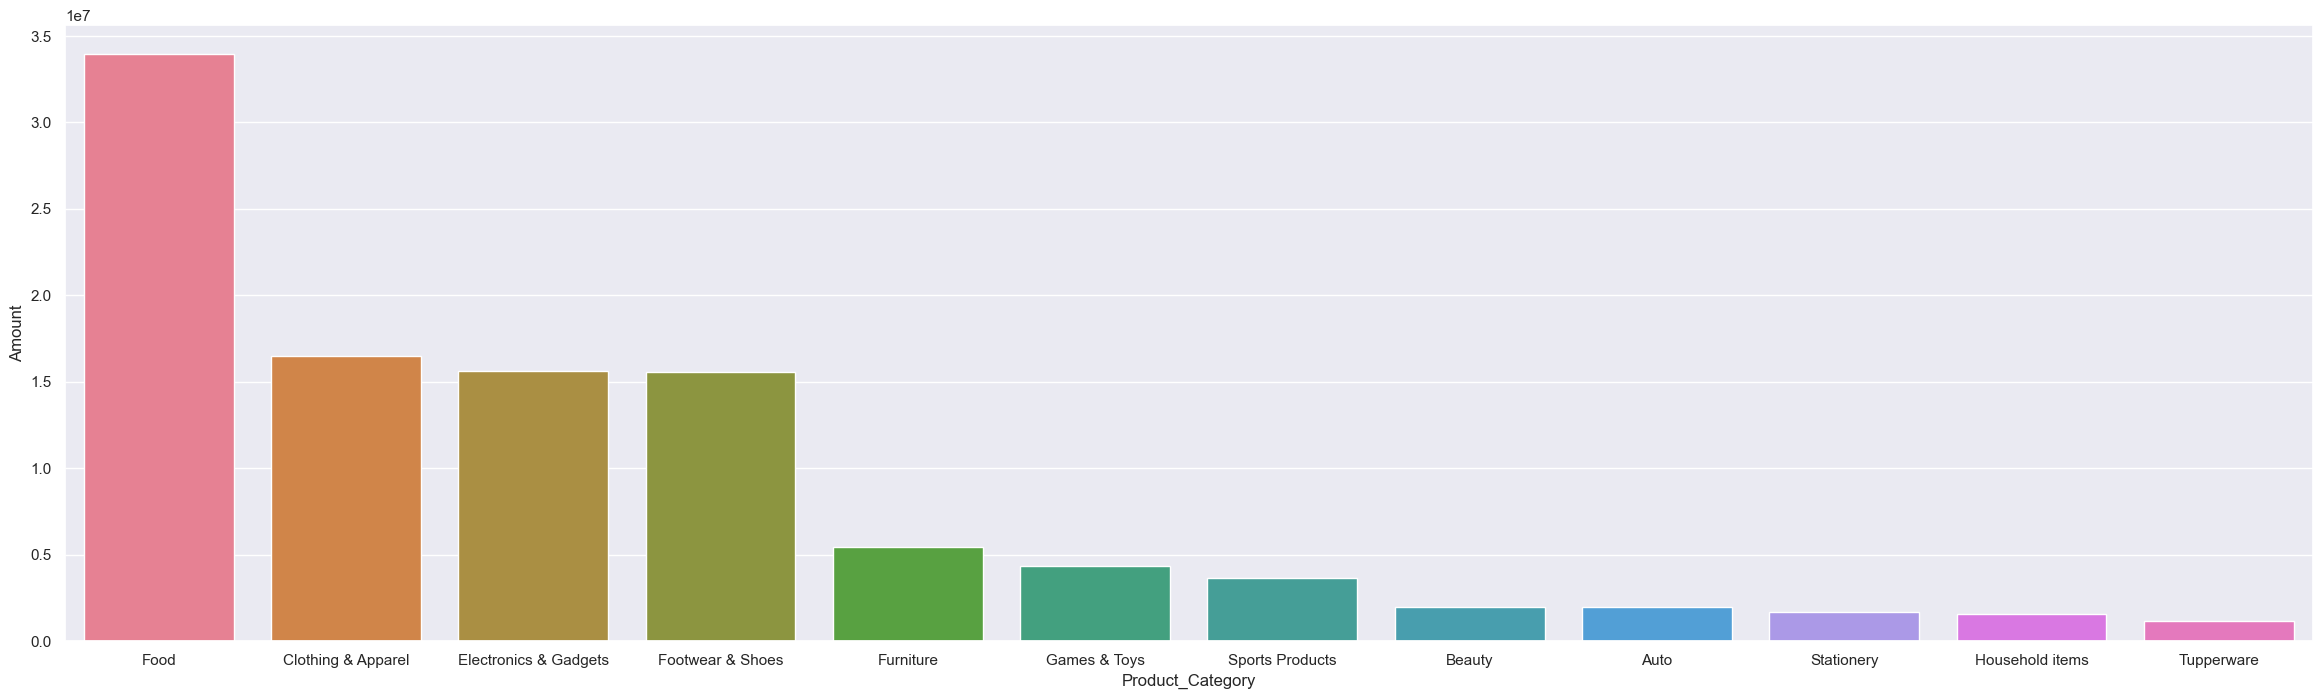

In [100]:
sales_by_Product_Category = Data_f.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(12)

sns.barplot(x='Product_Category', y='Amount', hue='Product_Category', data=sales_by_Product_Category)

#### From the above two plots we can conclude that most of the products bought are from Food, Clothing and Electronics category 

<Axes: xlabel='Product_ID', ylabel='Orders'>

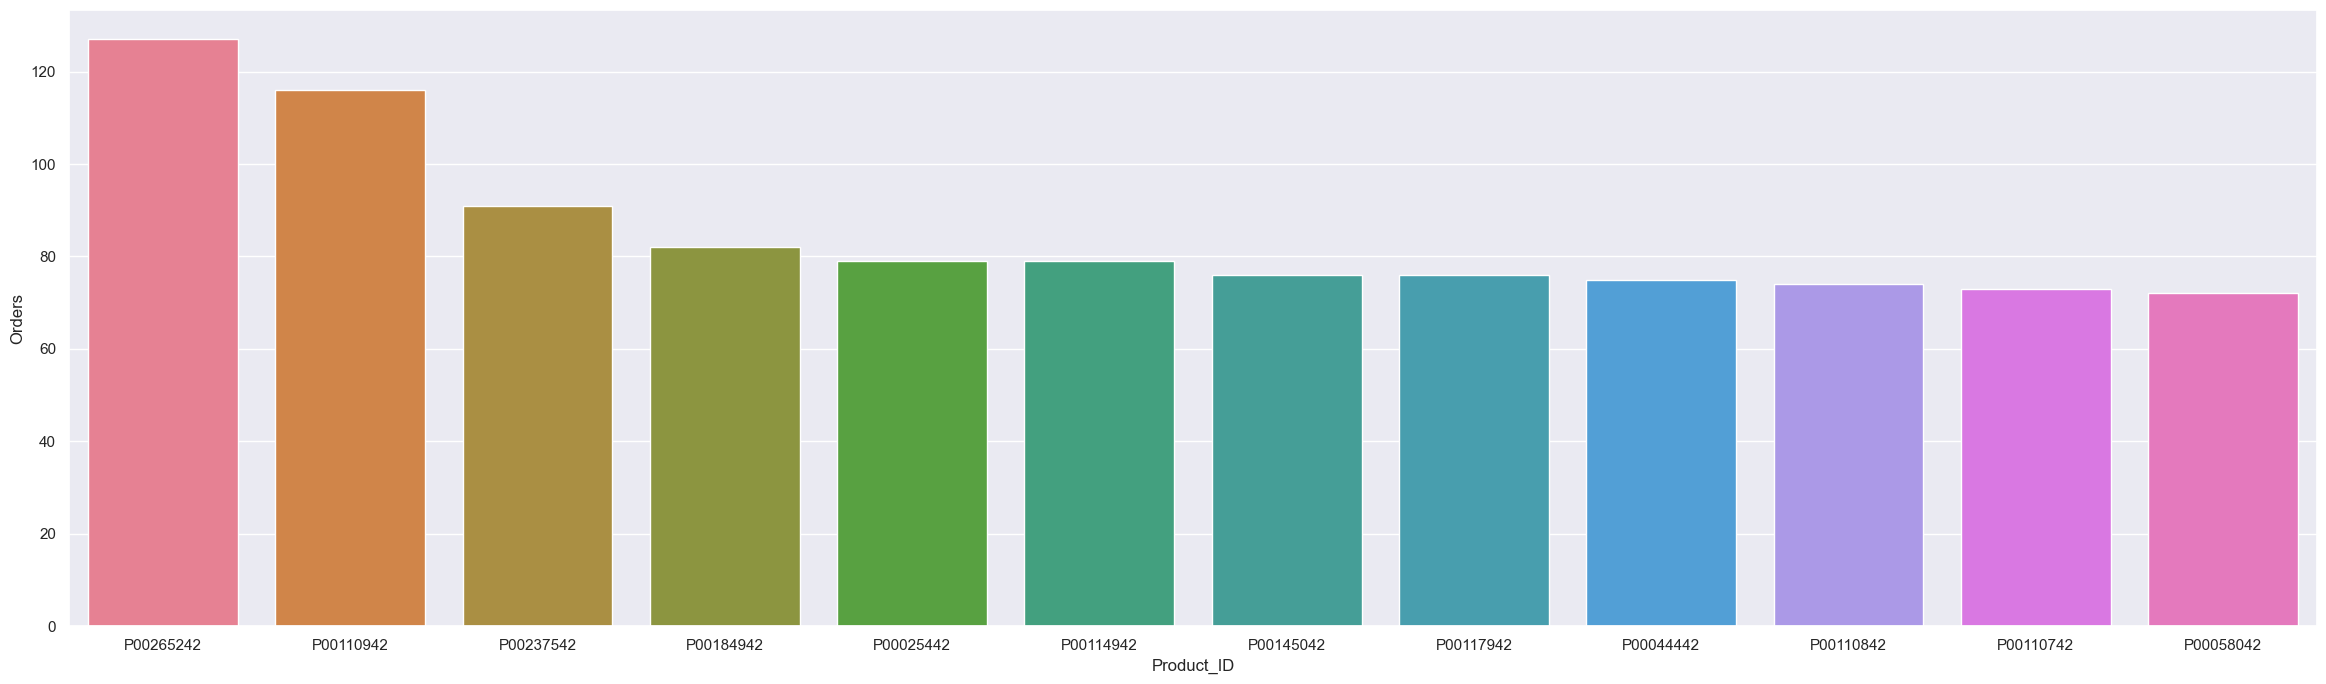

In [101]:
sales_by_Product_ID = Data_f.groupby('Product_ID', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(12)

sns.barplot(x='Product_ID', y='Orders', hue='Product_ID', data=sales_by_Product_ID)

## Overall Conlusion : Married women aged from 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category